<a href="https://colab.research.google.com/github/Francofus/IMSE441/blob/main/IMSE_441_Midterm_2_(F_F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
!pip install pingouin
import pingouin as pg
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
from scipy.stats import norm
import statsmodels.stats.power as smp

In [3]:
samp = [5.0, 3.4, 3.9, 1.3, 0.2, 0.9, 2.7, 3.7, 3.8, 4.1, 1.0, 1.0, 0.8, 0.4, 3.8, 4.5, 5.3, 6.1, 6.9,6.5]

In [4]:
sigma=np.std(samp)
sigma

2.073469314940542

In [5]:
ttest_1samp(a=samp, popmean= 4 )

TtestResult(statistic=-1.5451353441390414, pvalue=0.13880710560932794, df=19)

In [6]:
t_stat, p_value= ttest_1samp(a=samp, popmean= 4)

In [7]:
p_value

0.13880710560932794

In [9]:
#1-a)
if p_value < 0.01:
  print("We reject the null hypothesis")

else:
  print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


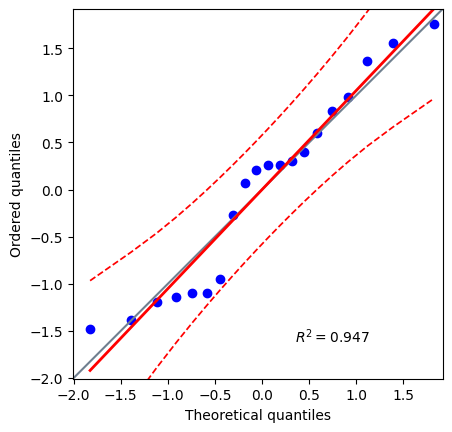

In [10]:
#b)
pg.qqplot(samp)
plt.show()

In [30]:
#c)
d=(4-3)/sigma
d

0.4822834815034028

In [31]:
alpha = 0.01
nobs1 = 20

In [32]:
power = smp.ttest_power(d, nobs1, alpha, alternative = 'two-sided')
# Print results
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.27


In [36]:
#d)
d = (4-2.5)/sigma
sample_size_samp = smp.tt_solve_power(effect_size =d, alpha = 0.01, power = 0.9, alternative = 'two-sided')
print('The sample size needed for each group is', round(sample_size_samp))

The sample size needed for each group is 32


**QUESTION #2**

In [48]:
F_1=np.array([63, 57, 58, 62, 66, 58, 61, 60, 55, 62, 59, 60, 58])
F_2=np.array([69, 65, 59, 62, 61, 57, 59, 60, 60, 62, 61, 66, 68, 66])

In [53]:
#A
alpha = 0.05
t_stat, p_value = stats.ttest_ind(F_1, F_2)
t_stat, p_value

(-2.0120470056553175, 0.05510877276061202)

P-Value is is grater than 0.05. Fail to reject the Null hypothesis 

In [55]:
#B
alpha = 0.05
t_stat, p_value = stats.ttest_ind(F_1, F_2, equal_var = False)
t_stat, p_value

(-2.030125494186018, 0.05338206244550379)

P-Value is is grater than 0.05. Fail to reject the Null hypothesis

#C 
The results from both test gave pretty similar values, both failing to reject the null Hypothesis so both giving basically the same output. Meaning that for this set of values is does not matter if they have different variances.

In [60]:
#D
alpha = 0.05
mean_diff = np.mean(F_1) - np.mean(F_2)
std_err = np.sqrt(np.var(F_1)/len(F_1) + np.var(F_2)/len(F_2))
t_stat = stats.t.ppf(1 - alpha/2, len(F_1) + len(F_2) - 2)

Low_CI = mean_diff - t_stat * std_err
Up_CI = mean_diff + t_stat * std_err
Low_CI, Up_CI

(-5.093091033112513, -0.06075512073364786)

Used this method since this is not a paired t-test

1)Confidence interval Low =5.093091033112513 
2)Confidence interval High =0.06075512073364786 

In [61]:
#E
Bf = [85.2, 79.6, 75.8, 72.6, 91, 89.9, 82, 81.7, 67.3, 68.4, 70, 74, 66.8, 60, 94, 88.2]
Af = [83.5,78.1, 73.2, 74, 90.2, 87, 79.9, 78.5, 64, 65.1, 67.8, 70, 64.6, 58.6, 92.9, 88]

In [62]:
ttest_rel(a=Bf, b= Af).confidence_interval(confidence_level=.99)

ConfidenceInterval(low=0.9412290978412794, high=2.946270902158721)